Dataset size: 100000
Positive samples: 50000
Negative samples: 50000
Predicted positive: 65500
Predicted negative: 34500

Classification Metrics:
Accuracy: 0.8450
Precision (PPV): 0.7634
Recall (Sensitivity): 1.0000
Specificity: 0.6900
F1-score: 0.8658
AUC-ROC: 0.8461
Matthews Correlation Coefficient: 0.7258

Confusion Matrix:
True Negatives: 34500
False Positives: 15500
False Negatives: 0
True Positives: 50000

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.69      0.82     50000
    Positive       0.76      1.00      0.87     50000

    accuracy                           0.84    100000
   macro avg       0.88      0.84      0.84    100000
weighted avg       0.88      0.84      0.84    100000



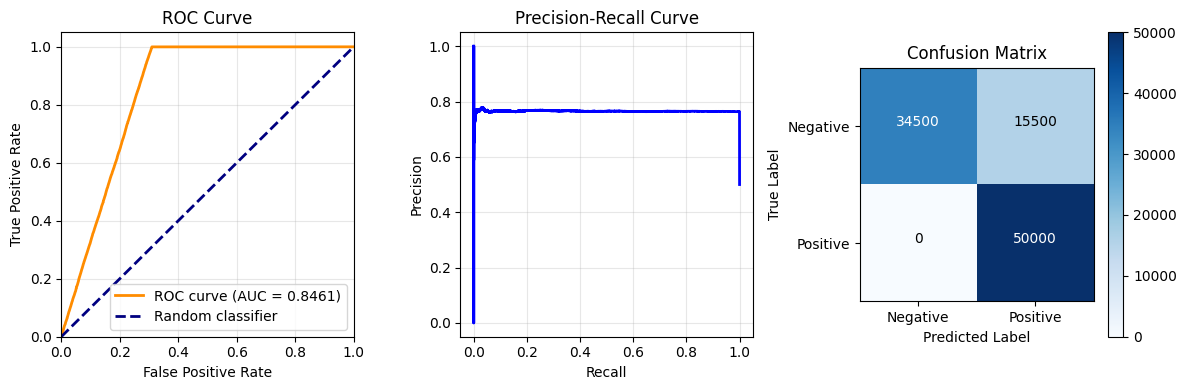


Verification:
Expected sensitivity (recall): 100% -> Actual: 100.0%
Expected specificity: 70% -> Actual: 69.0%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef, confusion_matrix,
    classification_report, roc_curve, precision_recall_curve
)
from tqdm import tqdm

# Generate balanced binary dataset
np.random.seed(42)
n_samples = 100000
n_positive = n_samples // 2
n_negative = n_samples // 2

# Create true labels (balanced)
true_labels = np.concatenate([
    np.ones(n_positive, dtype=int),   # positive samples
    np.zeros(n_negative, dtype=int)   # negative samples
])

# Generate model predictions based on the scenario:
# - All positives correct (100% sensitivity)
# - 70% of negatives correct (70% specificity)

predictions = np.zeros_like(true_labels)

# For positive samples: predict all as positive (100% correct)
positive_indices = np.where(true_labels == 1)[0]
predictions[positive_indices] = 1

# For negative samples: predict 70% as negative, 30% as positive (70% correct)
negative_indices = np.where(true_labels == 0)[0]
n_correct_negatives = int(0.69 * len(negative_indices))
correct_negative_indices = np.random.choice(negative_indices, n_correct_negatives, replace=False)
predictions[correct_negative_indices] = 0
# The remaining 30% of negatives will be predicted as positive (already initialized as 0, so we set them to 1)
incorrect_negative_indices = np.setdiff1d(negative_indices, correct_negative_indices)
predictions[incorrect_negative_indices] = 1

# Generate prediction scores for AUC calculation
# For positives: high scores (0.7-1.0 range)
# For negatives: mix of low scores for correctly classified (0.0-0.4) and high scores for misclassified (0.6-1.0)
prediction_scores = np.zeros(len(true_labels), dtype=float)

prediction_scores[positive_indices] = np.random.uniform(0.51, 1.0, len(positive_indices))
prediction_scores[correct_negative_indices] = np.random.uniform(0.0, 0.49, len(correct_negative_indices))
prediction_scores[incorrect_negative_indices] = np.random.uniform(0.51, 1.0, len(incorrect_negative_indices))

print(f"Dataset size: {len(true_labels)}")
print(f"Positive samples: {np.sum(true_labels == 1)}")
print(f"Negative samples: {np.sum(true_labels == 0)}")
print(f"Predicted positive: {np.sum(predictions == 1)}")
print(f"Predicted negative: {np.sum(predictions == 0)}")
print()

# Calculate classification metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
auc = roc_auc_score(true_labels, prediction_scores)
mcc = matthews_corrcoef(true_labels, predictions)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)
tn, fp, fn, tp = cm.ravel()

# Calculate additional metrics
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
npv = tn / (tn + fn)  # Negative Predictive Value
ppv = tp / (tp + fp)  # Positive Predictive Value (same as precision)

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (PPV): {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print()

print("Confusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print()

print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=['Negative', 'Positive']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, prediction_scores)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(true_labels, prediction_scores)
plt.subplot(1, 3, 2)
plt.plot(recall_curve, precision_curve, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)

# Plot confusion matrix
plt.subplot(1, 3, 3)
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar(im)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add text annotations to confusion matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print(f"\nVerification:")
print(f"Expected sensitivity (recall): 100% -> Actual: {recall:.1%}")
print(f"Expected specificity: 70% -> Actual: {specificity:.1%}")


In [ ]:
import numpy as np
import random
from collections import Counter, defaultdict
from datasets import load_dataset, Dataset, DatasetDict
from tqdm.auto import tqdm


# Load the dataset
data = load_dataset('GleghornLab/taxonomy_species_0.4_clusters')

# Get the top 25 most prevalent labels from the train set
label_counts = Counter(data['train']['labels'])
top_25_labels = [label for label, count in label_counts.most_common(25)]
top_25_labels_set = set(top_25_labels)  # Use set for O(1) lookup

print(f"Top 25 most prevalent labels: {label_counts.most_common(25)}")


def create_balanced_pairs_dataset(dataset_split, top_labels_set, num_pairs=None):
    """Create a balanced dataset of sequence pairs with same/different labels"""
    
    # Pre-filter and group in a single pass for efficiency
    label_groups = defaultdict(list)
    print("Filtering and grouping data in one pass...")
    
    # Process all data in batches to reduce memory overhead
    batch_size = 10000
    total_items = len(dataset_split['labels'])
    
    for start_idx in tqdm(range(0, total_items, batch_size), desc="Processing batches"):
        end_idx = min(start_idx + batch_size, total_items)
        
        # Process batch
        batch_labels = dataset_split['labels'][start_idx:end_idx]
        batch_entries = dataset_split['Entry'][start_idx:end_idx]
        batch_species = dataset_split['current_rank'][start_idx:end_idx]
        batch_sequences = dataset_split['Sequence'][start_idx:end_idx]
        
        for i in range(len(batch_labels)):
            label = batch_labels[i]
            if label in top_labels_set:  # O(1) lookup with set
                label_groups[label].append({
                    'Entry': batch_entries[i],
                    'species': batch_species[i], 
                    'Sequence': batch_sequences[i],
                    'labels': label
                })
    
    pairs = []
    
    # If num_pairs not specified, estimate from available data
    if num_pairs is None:
        total_filtered = sum(len(seqs) for seqs in label_groups.values())
        num_pairs = min(total_filtered // 2, 50000)  # Cap at reasonable size
    
    # Create balanced pairs (50% same label, 50% different label)
    same_label_pairs = num_pairs // 2
    diff_label_pairs = num_pairs - same_label_pairs
    
    # Pre-compute valid labels for same-label pairs (labels with >=2 sequences)
    valid_labels_for_pairs = [label for label, seqs in label_groups.items() if len(seqs) >= 2]
    all_labels_list = list(label_groups.keys())
    
    print(f"Found {len(label_groups)} labels in dataset split")
    print(f"Labels with >=2 sequences: {len(valid_labels_for_pairs)}")
    
    # Generate same label pairs efficiently
    print("Generating same label pairs...")
    same_pairs_generated = 0
    max_attempts = same_label_pairs * 10  # Increase attempts to avoid infinite loops
    
    for attempt in tqdm(range(max_attempts), desc="Same label pairs"):
        if same_pairs_generated >= same_label_pairs:
            break
            
        if not valid_labels_for_pairs:
            print("No valid labels for same-label pairs")
            break
            
        label = random.choice(valid_labels_for_pairs)
        sequences = label_groups[label]
        
        if len(sequences) >= 2:
            seq1, seq2 = random.sample(sequences, 2)
            pairs.append({
                'SeqA': seq1['Sequence'],
                'SeqB': seq2['Sequence'],
                'previous_label_a': seq1['labels'],
                'previous_label_b': seq2['labels'],
                'labels': 0  # Same label
            })
            same_pairs_generated += 1
    
    print(f"Generated {same_pairs_generated} same-label pairs")
    
    # Generate different label pairs efficiently
    print("Generating different label pairs...")
    diff_pairs_generated = 0
    max_attempts = diff_label_pairs * 10
    
    for attempt in tqdm(range(max_attempts), desc="Different label pairs"):
        if diff_pairs_generated >= diff_label_pairs:
            break
            
        if len(all_labels_list) < 2:
            print("Not enough different labels for different-label pairs")
            break
            
        # Pick two different labels
        label1, label2 = random.sample(all_labels_list, 2)
        if len(label_groups[label1]) == 0 or len(label_groups[label2]) == 0:
            continue
            
        seq1 = random.choice(label_groups[label1])
        seq2 = random.choice(label_groups[label2])
        
        pairs.append({
            'SeqA': seq1['Sequence'],
            'SeqB': seq2['Sequence'],
            'previous_label_a': seq1['labels'],
            'previous_label_b': seq2['labels'],
            'labels': 1  # Different labels
        })
        diff_pairs_generated += 1
    
    print(f"Generated {diff_pairs_generated} different-label pairs")
    print(f"Total pairs generated: {len(pairs)}")
    
    # Shuffle the pairs efficiently
    if len(pairs) > 0:
        print("Shuffling pairs...")
        random.shuffle(pairs)
    
    return pairs

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Create new datasets for each split with smaller sizes for faster processing
print("\nCreating training pairs...")
train_pairs = create_balanced_pairs_dataset(data['train'], top_25_labels_set, num_pairs=100000)

print("\nCreating validation pairs...")
valid_pairs = create_balanced_pairs_dataset(data['valid'], top_25_labels_set, num_pairs=1000)

print("\nCreating test pairs...")
test_pairs = create_balanced_pairs_dataset(data['test'], top_25_labels_set, num_pairs=1000)

# Convert to datasets format
all_train_seqs = [pair['SeqA'] for pair in train_pairs] + [pair['SeqB'] for pair in train_pairs]
all_valid_seqs = [pair['SeqA'] for pair in valid_pairs] + [pair['SeqB'] for pair in valid_pairs]
all_test_seqs = [pair['SeqA'] for pair in test_pairs] + [pair['SeqB'] for pair in test_pairs]
train_valid_intersection = set(all_train_seqs) & set(all_valid_seqs)
train_test_intersection = set(all_train_seqs) & set(all_test_seqs)
valid_test_intersection = set(all_valid_seqs) & set(all_test_seqs)

assert len(train_valid_intersection) == 0, "Train and valid sets intersect"
assert len(train_test_intersection) == 0, "Train and test sets intersect"
assert len(valid_test_intersection) == 0, "Valid and test sets intersect"

print("\nConverting to datasets format...")
train_dataset = Dataset.from_list(train_pairs)
valid_dataset = Dataset.from_list(valid_pairs)
test_dataset = Dataset.from_list(test_pairs)


new_data = DatasetDict({
    'train': train_dataset,
    'valid': valid_dataset,
    'test': test_dataset
})

print(f"\nNew balanced dataset:")
print(new_data)

# Verify balance
for split_name, split_data in new_data.items():
    if len(split_data) > 0:
        label_dist = Counter(split_data['labels'])
        print(f"{split_name}: {dict(label_dist)}")
    else:
        print(f"{split_name}: No data generated")

Top 25 most prevalent labels: [(8, 8769), (3, 6657), (4, 5499), (127, 4654), (1, 4166), (117, 3880), (331, 3474), (10, 2768), (6, 2518), (209, 2429), (110, 2273), (214, 1955), (114, 1866), (241, 1861), (99, 1737), (67, 1727), (5, 1695), (71, 1658), (219, 1645), (7, 1596), (135, 1397), (18, 1261), (14, 1226), (68, 1181), (406, 1181)]

Creating training pairs...
Filtering and grouping data in one pass...


Processing batches:   0%|          | 0/27 [00:00<?, ?it/s]

Found 25 labels in dataset split
Labels with >=2 sequences: 25
Generating same label pairs...


Same label pairs:   0%|          | 0/500000 [00:00<?, ?it/s]

Generated 50000 same-label pairs
Generating different label pairs...


Different label pairs:   0%|          | 0/500000 [00:00<?, ?it/s]

Generated 50000 different-label pairs
Total pairs generated: 100000
Shuffling pairs...

Creating validation pairs...
Filtering and grouping data in one pass...


Processing batches:   0%|          | 0/1 [00:00<?, ?it/s]

Found 25 labels in dataset split
Labels with >=2 sequences: 25
Generating same label pairs...


Same label pairs:   0%|          | 0/5000 [00:00<?, ?it/s]

Generated 500 same-label pairs
Generating different label pairs...


Different label pairs:   0%|          | 0/5000 [00:00<?, ?it/s]

Generated 500 different-label pairs
Total pairs generated: 1000
Shuffling pairs...

Creating test pairs...
Filtering and grouping data in one pass...


Processing batches:   0%|          | 0/2 [00:00<?, ?it/s]

Found 25 labels in dataset split
Labels with >=2 sequences: 25
Generating same label pairs...


Same label pairs:   0%|          | 0/5000 [00:00<?, ?it/s]

Generated 500 same-label pairs
Generating different label pairs...


Different label pairs:   0%|          | 0/5000 [00:00<?, ?it/s]

Generated 500 different-label pairs
Total pairs generated: 1000
Shuffling pairs...

Converting to datasets format...

New balanced dataset:
DatasetDict({
    train: Dataset({
        features: ['SeqA', 'SeqB', 'previous_label_a', 'previous_label_b', 'labels'],
        num_rows: 100000
    })
    valid: Dataset({
        features: ['SeqA', 'SeqB', 'previous_label_a', 'previous_label_b', 'labels'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['SeqA', 'SeqB', 'previous_label_a', 'previous_label_b', 'labels'],
        num_rows: 1000
    })
})
train: {1: 50000, 0: 50000}
valid: {0: 500, 1: 500}
test: {1: 500, 0: 500}


In [5]:
new_data.push_to_hub('GleghornLab/diff_phylo')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/100 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        : 100%|##########| 71.5MB / 71.5MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        : 100%|##########|  517kB /  517kB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        : 100%|##########|  571kB /  571kB            

CommitInfo(commit_url='https://huggingface.co/datasets/GleghornLab/diff_phylo/commit/360b72deff1afce5fcd07917f91a12c76ab2de5e', commit_message='Upload dataset', commit_description='', oid='360b72deff1afce5fcd07917f91a12c76ab2de5e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/GleghornLab/diff_phylo', endpoint='https://huggingface.co', repo_type='dataset', repo_id='GleghornLab/diff_phylo'), pr_revision=None, pr_num=None)

In [1]:
import random
import matplotlib.pyplot as plt
from datasets import load_dataset
from random import shuffle
from tqdm.auto import tqdm


data = load_dataset('Synthyra/BIOGRID', split='train')

org_a = list(data['OrgA'])
org_b = list(data['OrgB'])

percentages = []
num_shuffles = 100

for _ in tqdm(range(num_shuffles)):
    shuffled_a = org_a.copy()
    shuffled_b = org_b.copy()
    shuffle(shuffled_a)
    shuffle(shuffled_b)
    same = sum(1 for a, b in zip(shuffled_a, shuffled_b) if a == b)
    percentage = same / len(shuffled_a)
    percentages.append(percentage)

  0%|          | 0/100 [00:00<?, ?it/s]

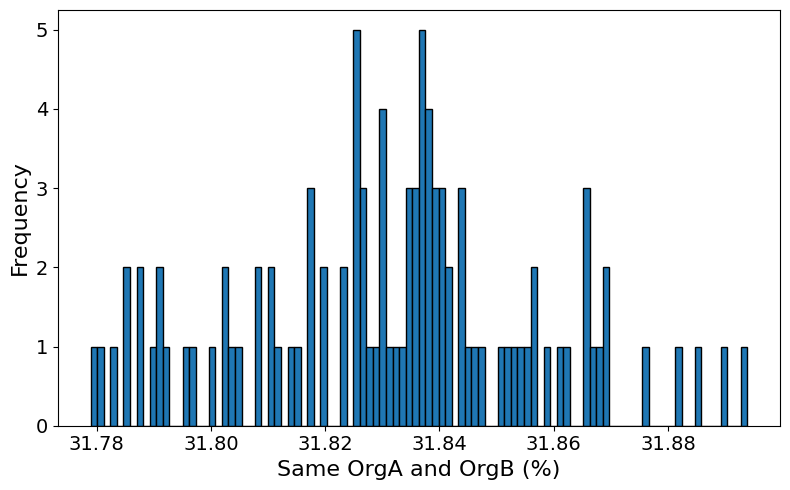

In [11]:
plt.figure(figsize=(8,5))
# Convert percentages to actual percent values for the x-axis
percentages_percent = [p * 100 for p in percentages]
plt.hist(percentages_percent, bins=num_shuffles, edgecolor='black')
plt.xlabel('Same OrgA and OrgB (%)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('shuffle_biogrid.png', dpi=300)
plt.show()
